<a href="https://colab.research.google.com/github/dhanhyuti/ET/blob/main/retaildata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of rows: 541909
Number of columns: 8

Column names:
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Data types:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

InvoiceNo and count of products per invoice:
 InvoiceNo
536365      7
536366      2
536367     12
536368      4
536369      1
           ..
C581484     1
C581490     2
C581499     1
C581568     1
C581569     2
Name: StockCode, Length: 25900, dtype: int64

CustomerID and average UnitPrice:
 CustomerID
12346.0    1.040000
12347.0    2.644011
12348.0    5.764839
12349.0    8.289041
12350.0    3.841176
             ...   
18280.0    4.765000
18281.0    5.622857
18282.0    4.821538
18283.0    1.614987
18287.0    1.493571
Name: UnitPrice, Length: 4372, dtype: float64

Description and

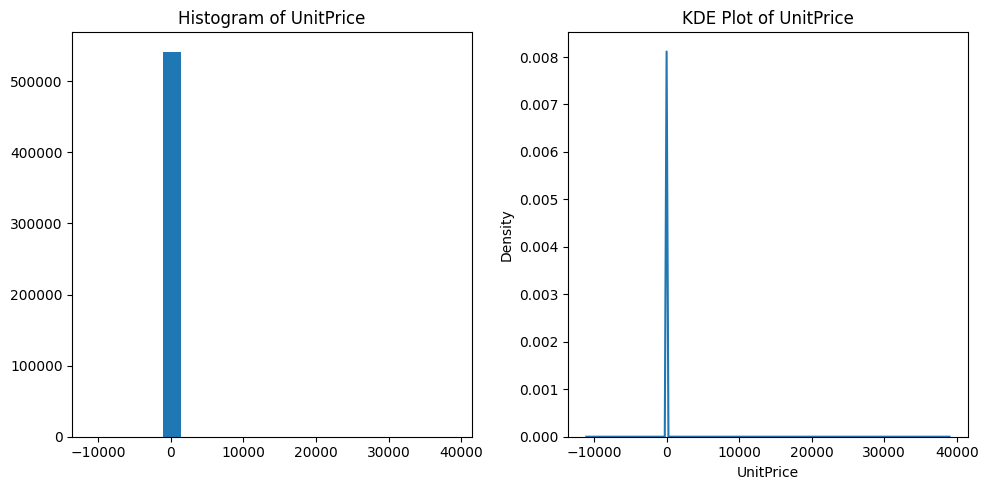


Outliers for UnitPrice:
        InvoiceNo StockCode                  Description  Quantity  \
1814      536544       DOT               DOTCOM POSTAGE         1   
3041      536592       DOT               DOTCOM POSTAGE         1   
4989      536835     22655  VINTAGE RED KITCHEN CABINET         1   
5685      536865       DOT               DOTCOM POSTAGE         1   
6165      536876       DOT               DOTCOM POSTAGE         1   
...          ...       ...                          ...       ...   
536834    581219       DOT               DOTCOM POSTAGE         1   
537254    581238       DOT               DOTCOM POSTAGE         1   
539368    581439       DOT               DOTCOM POSTAGE         1   
540908    581492       DOT               DOTCOM POSTAGE         1   
541540    581498       DOT               DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
1814    12/1/2010 14:32     569.77         NaN  United Kingdom  
3041    12/1/20

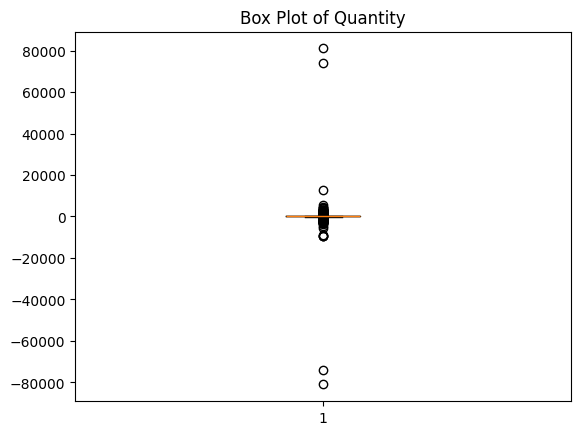

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 1. Load the online retail dataset
online_retail_data = pd.read_csv('online-retail-dataset.csv', encoding= 'unicode_escape') # encoding= 'unicode_escape' to handle special characters

# i. Print the number of rows and columns
num_rows = online_retail_data.shape[0]
num_columns = online_retail_data.shape[1]
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# ii. Print the column names
print("\nColumn names:\n", online_retail_data.columns)

# iii. Print the data types
print("\nData types:\n", online_retail_data.dtypes)

# iv. Print the InvoiceNo, and count of products per invoice
invoice_product_count = online_retail_data.groupby('InvoiceNo')['StockCode'].count()
print("\nInvoiceNo and count of products per invoice:\n", invoice_product_count)

# v. Print CustomerID and average UnitPrice
customer_avg_unitprice = online_retail_data.groupby('CustomerID')['UnitPrice'].mean()
print("\nCustomerID and average UnitPrice:\n", customer_avg_unitprice)

# vi. Print the Description and InvoiceDate of products sold either in United Kingdom or Denmark
filtered_data = online_retail_data[online_retail_data['Country'].isin(['United Kingdom', 'Denmark'])][['Description', 'InvoiceDate']]
print("\nDescription and InvoiceDate of products sold in UK or Denmark:\n", filtered_data)

# vii. Perform univariate analysis on the UnitPrice
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(online_retail_data['UnitPrice'], bins=20)
plt.title('Histogram of UnitPrice')

plt.subplot(1, 2, 2)
sns.kdeplot(online_retail_data['UnitPrice'])
plt.title('KDE Plot of UnitPrice')

plt.tight_layout()
plt.show()

# viii. Calculate outliers for the UnitPrice column
z_scores = np.abs(stats.zscore(online_retail_data['UnitPrice']))
outliers = online_retail_data[(z_scores > 3)]  # Using a threshold of 3 standard deviations

# ix. Print the records of products which are outliers as per their UnitPrice
print("\nOutliers for UnitPrice:\n", outliers)

# x. Plot a boxplot for the Quantity column
plt.boxplot(online_retail_data['Quantity'])
plt.title('Box Plot of Quantity')
plt.show()


# To see the output, run the code.